# Word Vectors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils import load_data

In [4]:
cbow_word_vectors = np.loadtxt("cbow_word_vectors.csv")
bengio_word_vectors = np.loadtxt("bengio_word_vectors.csv")
vocab, _, _ = load_data(preprocess=False)

In [5]:
print(vocab)

['$', "'s", ')', ',', '-', '--', '.', ':', ';', '?', 'a', 'about', 'after', 'against', 'ago', 'all', 'also', 'american', 'among', 'an', 'and', 'another', 'any', 'are', 'around', 'as', 'at', 'back', 'be', 'because', 'been', 'before', 'being', 'best', 'between', 'big', 'both', 'business', 'but', 'by', 'called', 'can', 'case', 'center', 'children', 'city', 'come', 'companies', 'company', 'could', 'country', 'court', 'day', 'days', 'department', 'did', 'director', 'do', 'does', 'down', 'dr.', 'during', 'each', 'end', 'even', 'every', 'family', 'federal', 'few', 'first', 'five', 'for', 'former', 'found', 'four', 'from', 'game', 'general', 'get', 'go', 'going', 'good', 'government', 'group', 'had', 'has', 'have', 'he', 'her', 'here', 'high', 'him', 'his', 'home', 'house', 'how', 'i', 'if', 'in', 'including', 'into', 'is', 'it', 'its', 'john', 'just', 'know', 'last', 'law', 'left', 'less', 'life', 'like', 'little', 'long', 'made', 'make', 'man', 'many', 'market', 'may', 'me', 'members', 'migh

In [6]:
def plot_tsne(word_vectors, vocab, n=None):
    
    # pick a random sample of all word vectors if there are too many
    index = np.arange(len(vocab))
    if not n is None:
        
        if n > len(vocab):
            raise ValueError(f"'n' ({n}) > the length of the vocabulary ({len(vocab)})")
        
        index = np.random.choice(index, size=n, replace=False)
        word_vectors = word_vectors[index, :]
    
    # compute tsne
    tsne = TSNE(n_components=2).fit_transform(word_vectors)
    x = tsne[:,0]
    y = tsne[:,1]

    # plot
    fig, ax = plt.subplots(figsize=(15,15), facecolor='white')
    plt.scatter(x, y, s=50, c='c')
    for i, idx in enumerate(index):
        word = vocab[idx]
        ax.annotate(word, (x[i], y[i]), fontsize=12)

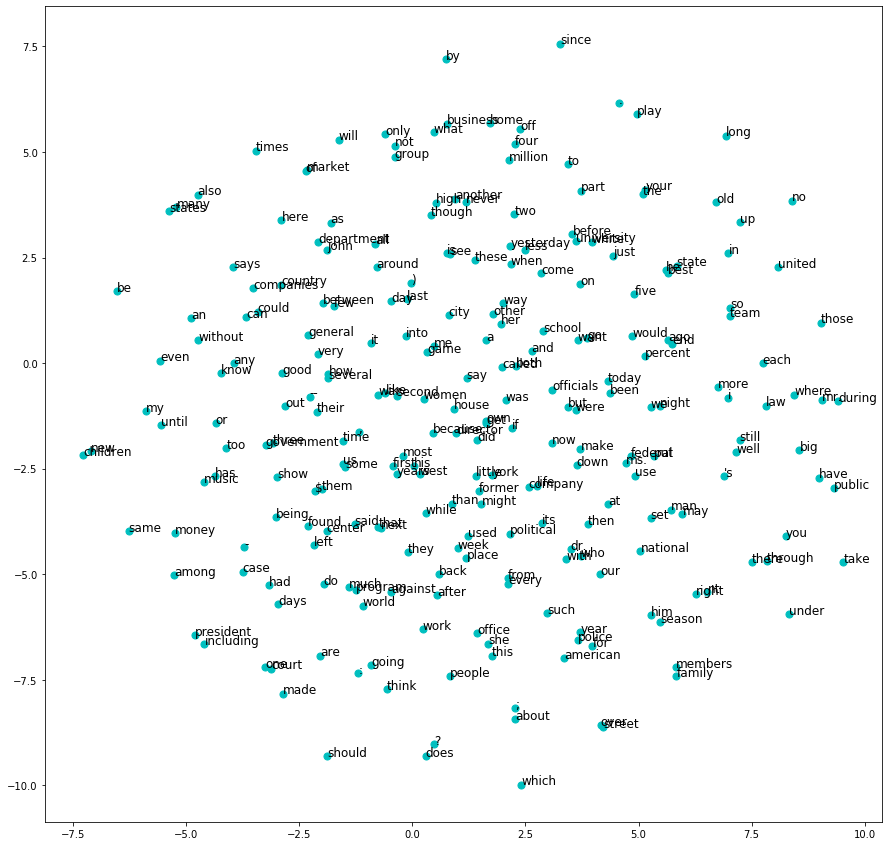

In [7]:
plot_tsne(cbow_word_vectors, vocab)

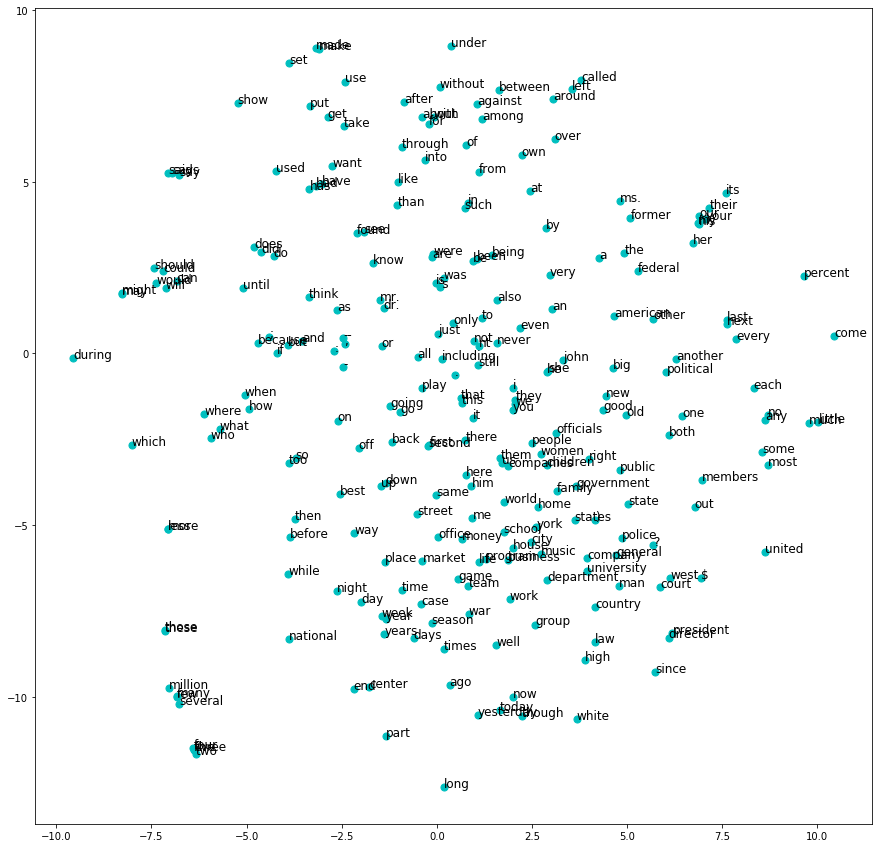

In [8]:
plot_tsne(bengio_word_vectors, vocab)

In [11]:
import torch
# pip install torchtext
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 50

.vector_cache/glove.6B.zip: 862MB [13:41, 1.05MB/s]                               
100%|█████████▉| 398329/400000 [00:24<00:00, 16415.45it/s]

In [12]:
glove['apple']

tensor([ 0.5204, -0.8314,  0.4996,  1.2893,  0.1151,  0.0575, -1.3753, -0.9731,
         0.1835,  0.4767, -0.1511,  0.3553,  0.2591, -0.7786,  0.5218,  0.4769,
        -1.4251,  0.8580,  0.5982, -1.0903,  0.3357, -0.6089,  0.4174,  0.2157,
        -0.0742, -0.5822, -0.4502,  0.1725,  0.1645, -0.3841,  2.3283, -0.6668,
        -0.5818,  0.7439,  0.0950, -0.4787, -0.8459,  0.3870,  0.2369, -1.5523,
         0.6480, -0.1652, -1.4719, -0.1622,  0.7986,  0.9739,  0.4003, -0.2191,
        -0.3094,  0.2658])

100%|█████████▉| 398329/400000 [00:40<00:00, 16415.45it/s]

In [13]:
def Euclidean_distance(x, y, dim=0):
    return torch.norm(y - x, dim=dim)

def Cosine_similarity(x, y, dim=0):
    return Euclidean_distance(x, y, dim=dim) / (torch.norm(x, dim=dim) * torch.norm(y, dim=dim))

def Cosine_distance(x, y, dim=0):
    return 1 - Cosine_similarity(x, y, dim=dim)

In [48]:
def get_closest_words(vec, n=5, distance=Cosine_similarity):
    dists = distance(glove.vectors, vec.unsqueeze(0), dim=1)
    dists = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    
    top = dists[0:n]
    for i, (idx, difference) in enumerate(top):
        print(f"{i+1}) {glove.itos[idx]:15s} {difference:5.2f}")
    
    #return dists[1:n+1]

In [49]:
get_closest_words(glove['nurse'])

1) nurse            0.00
2) doctor           0.13
3) nurses           0.14
4) pregnant         0.14
5) child            0.14


In [50]:
get_closest_words(glove['anxiety'])

1) anxiety          0.00
2) pain             0.12
3) headaches        0.12
4) symptoms         0.12
5) anger            0.13


In [51]:
get_closest_words((glove['one'] + glove['ten']) / 2)

1) one              0.08
2) ten              0.08
3) three            0.09
4) five             0.09
5) four             0.09


In [52]:
get_closest_words(glove['king'] - glove['man'] + glove['woman'])

1) king             0.09
2) queen            0.10
3) daughter         0.12
4) throne           0.12
5) princess         0.13


In [53]:
get_closest_words(glove['queen'] - glove['woman'] + glove['man'])

1) queen            0.09
2) king             0.10
3) prince           0.12
4) royal            0.13
5) crown            0.13


In [54]:
get_closest_words(glove['doctor'] - glove['man'] + glove['woman'])

1) doctor           0.09
2) nurse            0.11
3) woman            0.12
4) mother           0.12
5) child            0.12


In [55]:
get_closest_words(glove['doctor'] - glove['woman'] + glove['man'])

1) doctor           0.10
2) him              0.14
3) he               0.14
4) man              0.14
5) his              0.15


In [56]:
get_closest_words(glove['programmer'] - glove['man'] + glove['woman'])

1) programmer       0.14
2) therapist        0.18
3) educator         0.18
4) u.s.-venezuelan  0.19
5) mandopop         0.19


In [57]:
get_closest_words(glove['programmer'] - glove['woman'] + glove['man'])

1) programmer       0.13
2) software         0.16
3) computer         0.17
4) gerst            0.17
5) programmers      0.17


In [24]:
def glove_tsne_from_word_list(vocab):
    word_vectors = torch.tensor([list(glove[word]) for word in vocab])
    plot_tsne(word_vectors, vocab)

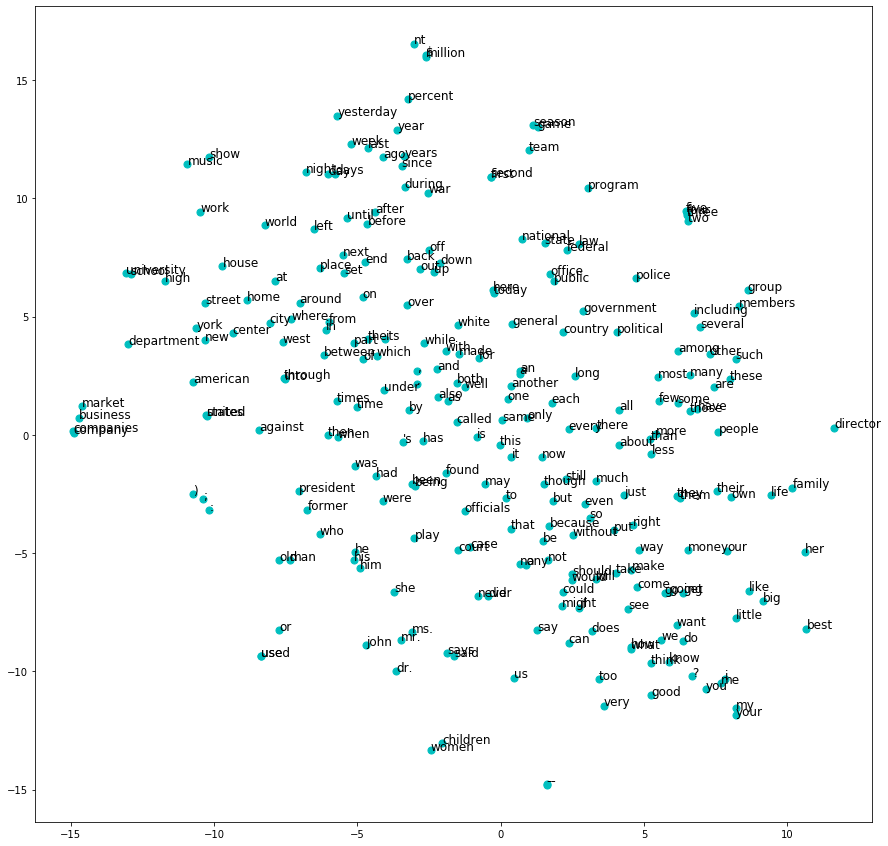

In [58]:
glove_tsne_from_word_list(vocab)

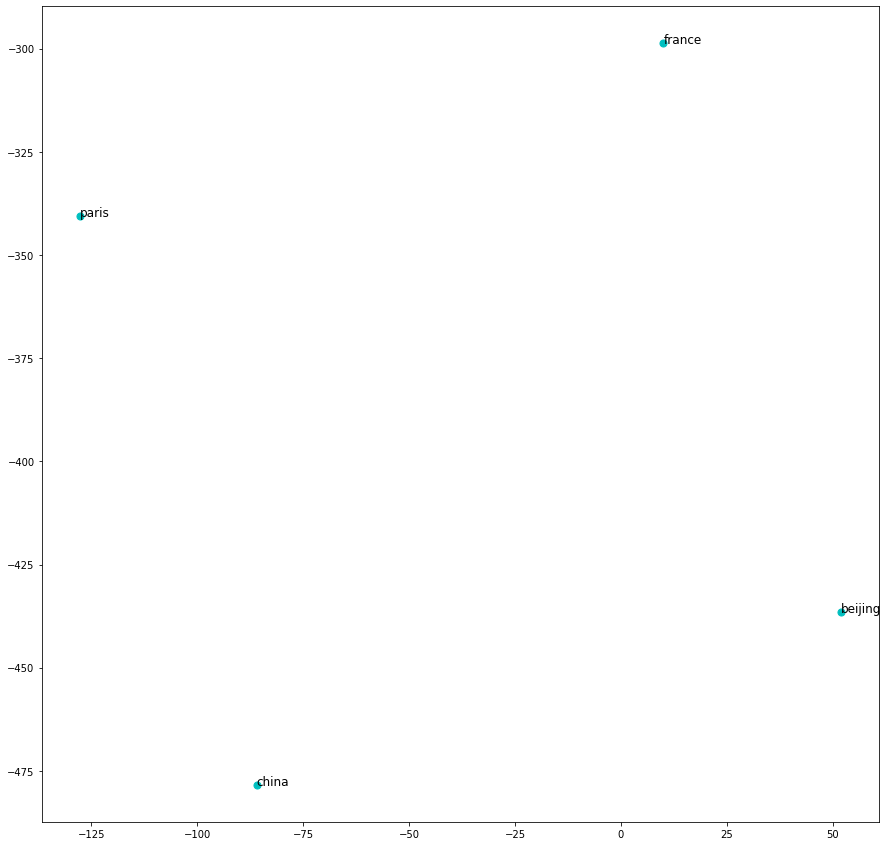

In [33]:
countries = ["china", "france"]
capitals = ["beijing", "paris"]

glove_tsne_from_word_list(countries + capitals)